# Practical No. 8: Frequency Distribution with Visualization

---- Frequency Distribution Program ----

Original Data:
   Values
0    34.0
1    54.0
2    65.0
3    54.0
4    89.0

Frequency Distribution:
Values
34.0    1
54.0    2
65.0    1
76.0    2
88.0    1
89.0    1
Name: count, dtype: int64

Relative Frequency Distribution:
Values
34.0    0.125
54.0    0.250
65.0    0.125
76.0    0.250
88.0    0.125
89.0    0.125
Name: count, dtype: float64

Cumulative Frequency Distribution:
Values
34.0    1
54.0    3
65.0    4
76.0    6
88.0    7
89.0    8
Name: count, dtype: int64


C:\Users\pndnt\AppData\Local\Temp\ipykernel_22756\784122588.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency.index, y=frequency.values, palette='viridis')


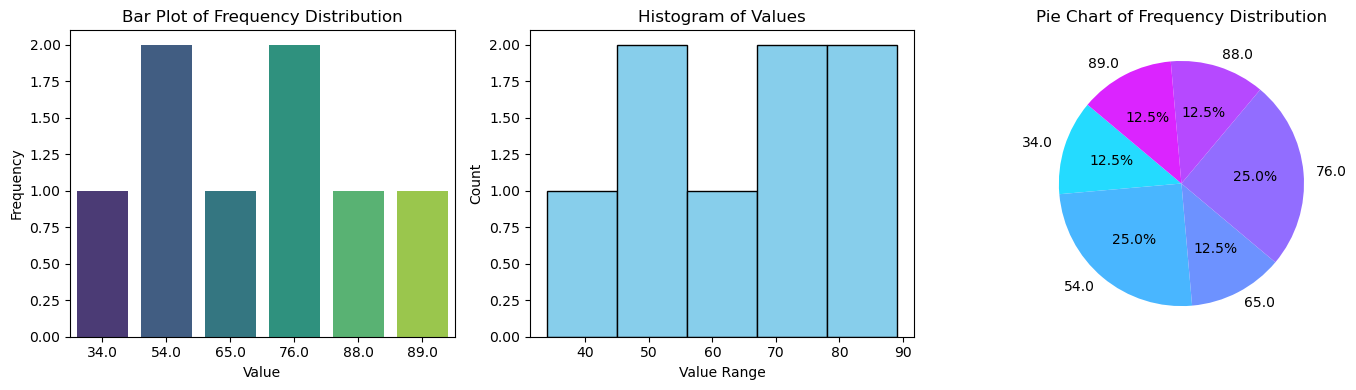

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("---- Frequency Distribution Program ----")

# ---- Step 1: Input Data ----
choice = input("Enter '1' for manual input or '2' to read from CSV file: ")

if choice == '1':
    # User inputs data manually
    n = int(input("Enter number of data points: "))
    data = []
    for i in range(n):
        value = float(input(f"Enter value {i+1}: "))
        data.append(value)
    df = pd.DataFrame({'Values': data})

elif choice == '2':
    # Read from CSV
    file_path = input("Enter CSV file path: ")
    column_name = input("Enter column name to analyze: ")
    df = pd.read_csv(file_path)
    df = df[[column_name]].rename(columns={column_name: 'Values'})
else:
    print("Invalid choice! Exiting program.")
    exit()

print("\nOriginal Data:")
print(df.head())

# ---- Step 2: Frequency Distribution ----
frequency = df['Values'].value_counts().sort_index()
print("\nFrequency Distribution:")
print(frequency)

# ---- Step 3: Relative Frequency ----
relative_freq = frequency / frequency.sum()
print("\nRelative Frequency Distribution:")
print(relative_freq)

# ---- Step 4: Cumulative Frequency ----
cumulative_freq = frequency.cumsum()
print("\nCumulative Frequency Distribution:")
print(cumulative_freq)

# ---- Step 5: Visualizations ----
plt.figure(figsize=(14, 4))

# (a) Bar Plot
plt.subplot(1, 3, 1)
sns.barplot(x=frequency.index, y=frequency.values, palette='viridis')
plt.title("Bar Plot of Frequency Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

# (b) Histogram
plt.subplot(1, 3, 2)
plt.hist(df['Values'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Values")
plt.xlabel("Value Range")
plt.ylabel("Count")

# (c) Pie Chart
plt.subplot(1, 3, 3)
plt.pie(frequency.values, labels=frequency.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cool'))
plt.title("Pie Chart of Frequency Distribution")

plt.tight_layout()
plt.show()